# Differences and similarities

Researchers in the humanities and the social sciences are often interested in the differences and similarities between texts. Studies may concentrate on the differences between texts in separate genres, or on the similarities between texts from distinct historical periods. Analyses such as these may be based on a wide range of textual aspects, such as the frequencies of the words that are used in texts, the average lengths of the sentences, or the proportions of nouns and adjectives. Using the values generated for metrics such as these, scholars can try to divide a collection of texts into smaller groups. The texts which display low values for a specific set of variables may all be placed in the same group, for example. It may then be interesting to examine whether the groups that can be created using such statistical analyses are similar in one way or another to other types of divisions, such as those based genre, year of creation or theme. 

## Euclidean distance

The differences between two collections of numbers can firstly be examined by calculating the euclidean distance. 

Suppose that you have two different texts. The first of these mention the word 'sun' 10 times and the the word 'moon' 26 times. In the second text, the freqencies of these same words are 17 and 10. These numbers can be visualised in a scatter plot using the code below.  

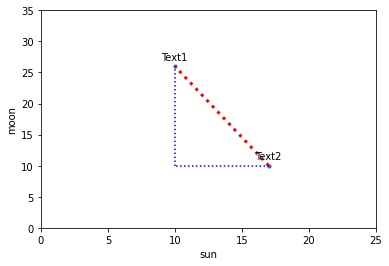

In [1]:
import pandas as pd
import seaborn as sns

data = [ [10,26] ,  [17,10] ] 

df = pd.DataFrame(data, columns = ['sun', 'moon' ] , index = [ 'Text1','Text2' ] )

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

sns.scatterplot( data = df , x = 'sun' , y = 'moon' , s = 20 )

plt.xlim(0, 25)
plt.ylim(0, 35)

for index,row in df.iterrows():
    plt.text( row['sun']-1, row['moon']+1, index )

    
plt.plot( [17,10] , [10,26], 'r:' , linewidth=3)
plt.plot( [17,10] , [10,10], 'b:' )
plt.plot( [10,10] , [10,26], 'b:' )

plt.show()

The euclidean distance between these two points is the length of the line connecting these points. In the scattor plot above, this is the red dotted line. The length of this line can be calculated using the Pythagorean theorem. Given the lengths of the two blue lines, 7 and 16, it can be calculated that the length of the blue line is 17,64. 

In the example that was given, the distance between the two texts was calculated using two variables only. It is also possible, however, to expand the number of variables. With more than two variables, we need to calculate the length of a vector representing distances in a multi-dimensional space. 


## Cosine similarity and cosine distance

Alternatively, you can also compere texts by calculating the *cosine similarity*. The cosine similarity between two points is calculated by firstly connecting both of these points to the origin of the graph (i.e. the point where both `x` and `y` are 0). You can see an illustration of this in the scatter plot below.

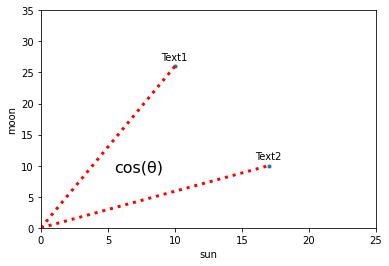

In [2]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

sns.scatterplot( data = df , x = 'sun' , y = 'moon' , s = 20 )

plt.xlim(0, 25)
plt.ylim(0, 35)

for index,row in df.iterrows():
    plt.text( row['sun']-1, row['moon']+1, index )

    
plt.plot( [0,17] , [0,10], 'r:' , linewidth=3)
plt.plot( [0,10] , [0,26], 'r:' , linewidth=3)
plt.text( 5.5 , 9 , 'cos(θ)' , size = 16)

plt.show()

The cosine similarity is the *cosinus* of the angle in between these two lines. The calcluation of the cosine similarity results in a number in between 0 and 1. If the similarity is 1 (i.e. the cosinus of 0), this means that the two points are on the same line. Note that, while the euclidean distance gives an indication of the differences between two sets of numbers, the cosine similarity measures the degree to which these numbers are the same. 

To convert the cosine similarity into a metric that indicates the distance, we simply need to subtract the cosine similarity from the number 1:

\\( Dc(A,B) = 1 - Sc(A,B) \\)

This measure is called the *cosine distance*. 

The cosine distance largely ignores the dimensions of the data. The formula mainly considers the question whether the different points are on the same straight line. The *euclidean distance* between the points (1,2) and (100,200) would be quite large, but their cosine distance would be 0. 

Like the Euclidean distance, it is also possible to calculate the cosine distance for data sets containing more than two variables. In the case of such multivariate data sets, we need to create the angles in multi-dimensional vectors. 


## Scikit-learn

In Python, you can calculate the Euclidean distance and the cosine distance using `scikit-learn`, a library that can be used for Machine Learning. This `scikit-learn` library is shipped with the free Anaconda distribution of Python. The `euclidean_distances()` method from this library demands a Pandas data frame as a parameter. It returns a matrix which contains the euclidean distances between all the rows in the data frame. This shape of this matrix is a square: the number of rows and the number of columns are exacly the same. The number of rows and columns correspond to the number of rows in the data frame that was given as input to the `euclidean_distances()` method. 

The code below using the method to calculate the euclidean distances between the two points in the `df` data frame that was discussed earlier. 

In [3]:
from sklearn.metrics.pairwise import cosine_distances , euclidean_distances

matrix = euclidean_distances(df)
print(matrix)

[[ 0.        17.4642492]
 [17.4642492  0.       ]]


The data frame `df` contains two rows, and the matrix that is created by `euclidean_distances` consequently has two rows and two columns. The second value on the first row contains the euclidean distance between 'Text1' and 'Text2'.

The method `cosine_distances()` works in a very similar way:

In [4]:
matrix = cosine_distances(df)
print(matrix)

[[0.         0.21735864]
 [0.21735864 0.        ]]


## A term-document matrix

The data frame that was used in the examples above contains only two columns. As was mentioned, however, it is also possible to calculate euclidean and cosine distances for date frames containing more than two columns. 

Studies of the differences and the similarities between texts may be based on the frequencies of the words used in these texts. Such comparisons can be performed effectively on the basis of a so-called term-document matrix. This is data structure which captures word frequencies for all the texts in a corpus. In this data structure, the words that are counted form the columns. Each row captures the frequencies of these words in a specific text. The data frame named `df`, which was discussed earlier in this notebook, was in fact a very simple example of a term-document matrix. It described two texts and two words only, but the number of rows and the number of columns can clearly be expanded.  

The code below can be used to create a term-document matrix for all the texts in your corpus. The code firstly identifies the 1000 most frequent words in the full corpus. Next, it calculates all the frequencies of these words within individual texts. 

The results are saved in a data frame named `termdocmatrix`.

In [ ]:
import tdm
from tdm import word_tokenise , sortedByValue
from nltk.corpus import stopwords
from os.path import join
import os
import re

dir = 'Corpus'
numberOfWords = 1000
freq = dict()
mfw = []


stop_words = set(stopwords.words('english'))

print( f'Finding the {numberOfWords} most frequent words in the corpus ...' )

for file in os.listdir(dir):
    if re.search( r'\.txt$' , file ):
        fullText = open( join( dir , file ) , encoding = 'utf-8' , errors = 'ignore' ).read()
        words = word_tokenise(fullText)
        for w in words:
            if w not in stop_words and re.search( '\w' , w ):
                freq[w.lower()] = freq.get( w.lower() , 0 ) + 1
                
def sortedByValue( dict ):      
    return sorted( dict , key=lambda x: dict[x]) 

all_words = list( reversed(sortedByValue(freq)) )
for w in all_words[:1000]:
    mfw.append(w)


termdocmatrix = pd.DataFrame( columns= mfw )
nr_tokens = dict()  
        
for file in os.listdir(dir):
    if re.search( r'\.txt$' , file ):
        print( f'Calculating the word frequencies for {file} ...' )
        freq = dict()
        new_row = dict()
        fullText = open( os.path.join( dir , file ) , encoding = 'utf-8' , errors = 'ignore' ).read()
        words = tdm.word_tokenise(fullText)
        title = re.sub( r'\.txt$' , '' , file)
        new_row['index'] = title
        nr_tokens[title] = len(words)
        for w in words:
            freq[w.lower()] = freq.get( w.lower() , 0 ) + 1
  
        for w in mfw:
            new_row[w] = freq.get( w , 0 ) 
            
        termdocmatrix = termdocmatrix.append( new_row , ignore_index=True)


termdocmatrix =termdocmatrix.set_index('index')        
print('Done!')

Once this large term-document matrix is created, we can create the cosine distances between all the texts using `scikit-learn`.

In [6]:
matrix = cosine_distances(termdocmatrix)

The `cosine_distances()` method returns an object of type `Numpy array`. The following code converts this object to a regular Pandas data frame. With this format, it becomes easier to visualise the data.  

In [7]:
titles = []
dir = 'Corpus'

titles = list(termdocmatrix.index)
matrix_df = pd.DataFrame( matrix , columns = titles , index = titles )

## A heat map

The matrix containing the cosine distances can be visualised effectively as a heat map. Such a graph can be created using the `heatmap()` method in `Seaborn`. 

A heat map is a diagram which consists of tiles in specific colours. Data values can be represented using the gradients in between two colours. A heat map often helps to identify specific notable values. 


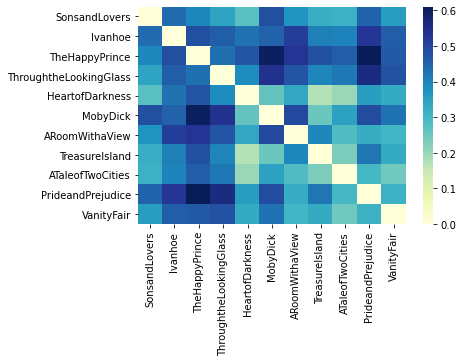

In [8]:
import seaborn as sns
# Heatmap
ax = sns.heatmap( matrix_df , cmap="YlGnBu"  )

## A dendrogram

The results of these measures of distances can also be visualised using dendrograms. They are diagrams which divide corpora into clusters, based on an analysis of the overall differences between the texts. In such dendrograms, the texts which are most similar form a single branch, and texts which display fewer similarities do not form a union until a much later stage. An analysis based on dendrograms is also referred to as a *hierarchical cluster analysis*. 

Dendrograms can be created using the code below. This code may generate a warning, but this warning may be ignored. 

<ipython-input-9-73a56d2dce66>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkages = linkage(matrix_df,'ward')


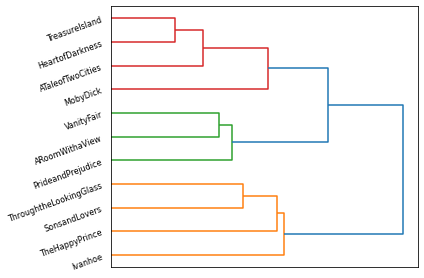

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkages = linkage(matrix_df,'ward')

import matplotlib.pyplot as plt
dendrogram( linkages , labels = matrix_df.index , orientation="right", leaf_font_size=8, leaf_rotation=20)
plt.tick_params(axis='x', which='both', bottom=False,
top=False, labelbottom=False)
plt.tight_layout()
plt.show()

## A normalised term-document matrix

The term-document matrix that was created earlier, and which was stored as a data frame named `termdocmatrix`, contains the absolute counts of the words. In other words, it contains the total number of times the given word occurs in each text. These absolute counts cannot easily be compared, as the texts are clearly of a different length. Their total token counts are different. 

For the calculation of the cosine distance, these different lengths don't have much of an impact. As was explained, this measure of difference mostly considers proportions and largely overlooks the actual dimensions. The cosine distance between points (10,20) and (100,200) is zero, for instance. The cosine distance formula can be used effectively, for this reason, with texts with different lengths. 

These dimmension do make a difference, however, in the calculation of the Euclidean distance. In order to work with this specific measure of difference, it is useful to create a normalised term-document matrix. This is a matrix in which all the absolute frequencies are divided by the total number of tokens in each text. After this division, the numbers will represent percentages or ratios. These ratios allow for a fairer comparison. 

In [ ]:
## Create a new blank data frame
termdocmatrix_norm = pd.DataFrame( columns= mfw )

## The columns in 'termdocmatrix' are the 
## 1000 most frequent word
mfw = list( termdocmatrix.columns )

## the new blank data frame named termdocmatrix_norm
# is filled: In each column, the absolue counts
# are divided by the number of tokens 
# the dictionary 'nr_tokens' was created in an earlier cell
for text,word in termdocmatrix.iterrows():
    new_row = dict()
    new_row['index'] = text
    for w in mfw:
        new_row[w] = word[w] / nr_tokens[text]
    termdocmatrix_norm = termdocmatrix_norm.append( new_row , ignore_index=True)


termdocmatrix_norm = termdocmatrix_norm.set_index('index')        
print('Done!')


The normalised term-document matrix, named `termdocmatrix_norm`, can be used with the method `euclidean_distances()`.

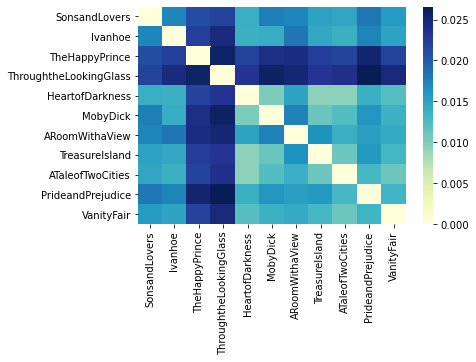

In [11]:
matrix = euclidean_distances(termdocmatrix_norm)

titles = []
dir = 'Corpus'

titles = list(termdocmatrix_norm.index)
        
matrix_df = pd.DataFrame( matrix , columns = titles , index = titles )

import seaborn as sns
# Heatmap
ax = sns.heatmap( matrix_df , cmap="YlGnBu"  )

## A network

The analyses that have been discussed above were all based on measures of differences. As was mentioned, however, the cosine similarity does not focus on difference, but on the degree to which texts are identical. 

The cosine similarity may be used to develop a network representation of a text corpus. A network, more broadly consists of a collection of nodes. These nodes can be connected by edges. 

In such a network visualisation, we can represent all the texts in the coprus as nodes. Using the cosine similarity matrix, we decide whether the nodes should be connected via edges. In the code below, edges are added between two texts if their cosine similarity is 0.7 or higher. 

The network is created and drawn using the `networkx` library.

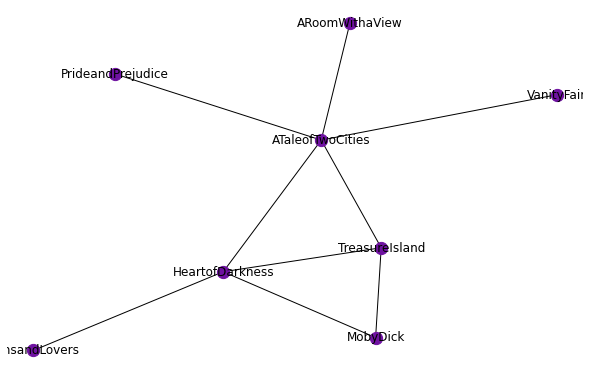

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

matrix = cosine_similarity(termdocmatrix)
matrix_df = pd.DataFrame( matrix , columns = titles , index = titles )
            
                
nodes = [] 
edges = []


related_texts = list(matrix_df.columns)

## an edge is drawn in between two nodes
# if the cosine similarity is 0.7 or higher
min_similarity = 0.7

for text,values in matrix_df.iterrows():
    for rt in related_texts:
        if text != rt:
            if values[rt] >= min_similarity:
                edges.append( (text,rt) )
                nodes.append(text)

nodes = list( set(nodes) )

G = nx.Graph()
G.add_nodes_from( nodes )
G.add_edges_from( edges )


plt.figure(figsize=(8,5))
nx.draw(G , node_size=150 , with_labels = True , node_color='#6f12a1')
                

## Principal component analysis

Differences and similarities between texts can also be compared via a Principal Component Analysis (PCA). Simply put, this is a form of multi-variate analysis in which a large number of variables can be replaced by a much smaller number of variables. The method aims to create new variables which can account for most of the variability in the full data set. These new variables are referred to as the principal components. If the first two principal components account for most of the variability, the global distribution of the values in your data can be clarified by plotting these two principal components on a scatter plot.

The `Scikit-learn` library, which was mentioned above, contains many methods in the field of machine learning. It also contains a number of methods for working with PCA.

The `PCA()` method, form the `sklearn.decomposition` module, can be used to create an object which can carry out to calculation. While creating this object, you need to specify the number of components that you want to work with. This new object that results from `PCA()` has a method named fit_transform(). When you supply a data frame containing numbers as its parameter, the output will be a set of principal components. To make the visualisation easier, the `principalComponents` object is converted into a Pandas data frame.

The first two principal component can then be visualised using a scatter plot. The texts that are close to each other in the scatter plot are also assumed to use roughly the same words, in roughly the same frequencies.

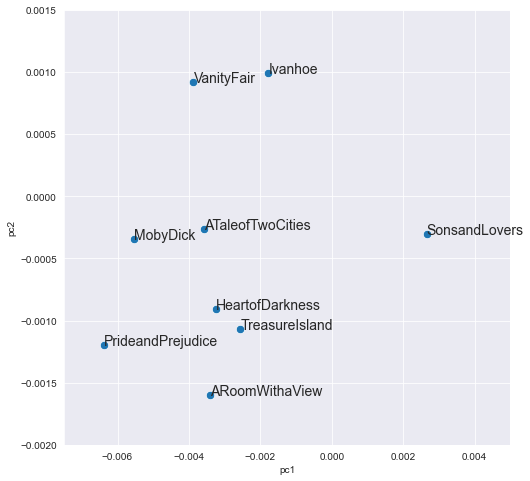

In [13]:
from sklearn.decomposition import PCA
import pandas as pd
import re


sns.set_style("darkgrid")

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(termdocmatrix_norm)
pcDf = pd.DataFrame(data = principalComponents , columns = ['pc1', 'pc2'])


df = pd.read_csv( 'metadata.csv' )
pcDf['title'] = df['title']
#pcDf['class'] = df['class']


## plot principal component in a scatter plot


%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize = (8,8))
sns.scatterplot( data = pcDf , x = 'pc1', y = 'pc2' , s = 70  )


xlim = (-0.0075,0.005 )
ylim = (-0.002,0.0015 )

plt.xlim( xlim )
plt.ylim( ylim )

for index, row in pcDf.iterrows():
    if xlim[0] <= row['pc1'] <= xlim[1] and ylim[0] <= row['pc2'] <= ylim[1]:
        plt.text( row['pc1']  , row['pc2']  , row['title'] , size = 14) 


plt.show()